<a href="https://colab.research.google.com/github/alishahmad/cove/blob/master/BLANK_Sentiment_Analysis_VADER_using_Reddit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
Reddit is a social news site where users create and share content, with millions of active users daily. This network contains millions of rich data that can be used in sentiment analysis projects. Reddit is one of the biggest platforms where individuals ask questions and share ideas regarding topics ranging from Politics, Entertainment, Money, Tech, etc.

# **Prerequisites**
To follow this article you will need the following installed and activated on your PC. Also, feel free to fork the GitHub Repo for the code and other necessary materials.

*   Reddit Developer Account.
*   Installation of PRAW Library.

# Developer Application
In order to have full access to Reddit API, you will need to create a developer account. This can be done by clicking on this link [Prefs](https://www.reddit.com/prefs/apps) and follow the instruction in the diagram below.

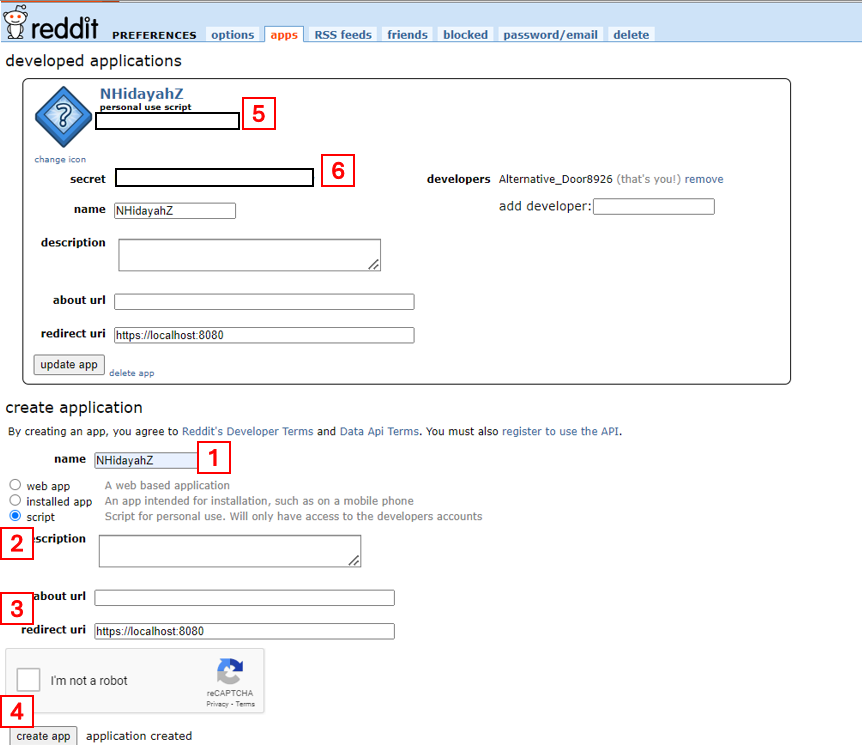


1.   App Name: Firstly, you need to give your app a name.
2.   Script: Check the Script button, this is used for personal use and projects.
3.   Redirect Uri: For this, we will be using our local host of our pc ”https://localhost:8888" or 8080.
4.   Create app: The create app will help you generate an ID number and Secret key. (Copy both keys and keep them in a safe place).
5.   Keys: Copy both keys as they will be needed in the code.




# PRAW Installation
The PRAW library provides a means of communication with the Reddit server, it is also known as the Python Reddit API wrapper. It supports three types of applications; Web Applications, Installed Applications, and Script Applications.

Note before you can use the PRAW library, you first must register the appropriate application type on Reddit

In [17]:
pip install praw

In [12]:
import praw


# Authentication
At this stage, this is where the “*user_agent, keys, and client id*” are needed.

In [23]:
reddit = praw.Reddit(
    client_id="J5F8RSq6xnclfe-XL9ftoA",  # Make sure this is your actual client ID
    client_secret="tICAM8DdIHjbO_xQmFdZSriG12KXIg",  # Make sure this is your actual client secret
    user_agent="AmmyAlish",  # Make sure this is a descriptive user agent
    check_for_async=False
)


Import all necessary Libraries

In [24]:
import pandas as pd
import numpy as np
import re

# **# Get Trending Topics from your Subreddit**
A subreddit is a subsidiary category of the Reddit website, and for this session, we will be using the “gold” subreddit channel.

In [26]:
# Hot new rising topics
headlines = set()
for submission in reddit.subreddit("palestine").hot(limit=None):
 print(submission.id) #ID
 print(submission.author) #Author of the subreddit
 print(submission.created_utc) #Date and time being created
 print(submission.score) # Average Score
 print(submission.upvote_ratio) # Upvote ratio
 print(submission.url) # Like to the Subreddit


 break
 headlines.add(submission.title)
print(len(headlines))

1henlq1
Fireavxl
1734247957.0
116
0.97
https://www.reddit.com/r/Palestine/comments/1henlq1/the_myth_of_the_conflict_is_ancient/
0


# **Create a DataFrame**
The DataFrame will help structure the scrapped data into a tabular format that can easily be read.

In [34]:
palestine_df = pd.DataFrame(headlines)
palestine_df.head()

""


# Rename Column Header
You will need to put the appropriate column header.

In [ ]:
palestine_df.columns = ['Titles']
palestine_df.head()

In [ ]:
palestine_df.Titles.duplicated().sum()

# Remove Unicode and Hyperlinks
These are unwanted texts, characters, and links, with the removal of these, will help improve our prediction model. The code below uses a regex pattern to quickly remove unwanted characters.

In [ ]:
#Create a function to clean the text
def cleanTxt(text):
# text = re.sub(r'@[A-Za-z0–9]+', '', text) #Remove @mentions replace with blank
# text = re.sub(r'#', '', text) #Remove the ‘#’ symbol, replace with blank
# text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
# text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
 text = re.sub(r':', '', text) # Remove :
 return text
#Cleaning the text
palestine_df["Titles"]= palestine_df["Titles"].apply(cleanTxt)
#Show the clean text
palestine_df.head()

def remove_emoji(string):
 emoji_pattern = re.compile("["
 u"\U0001F600-\U0001F64F" # emoticons
 u"\U0001F300-\U0001F5FF" # symbols & pictographs
 u"\U0001F680-\U0001F6FF" # transport & map symbols
 u"\U0001F1E0-\U0001F1FF" # flags (iOS)
 u"\U00002500-\U00002BEF" # chinese char
 u"\U00002702-\U000027B0"
 u"\U00002702-\U000027B0"
 u"\U000024C2-\U0001F251"
 u"\U0001f926-\U0001f937"
 u"\U00010000-\U0010ffff"
 u"\u2640-\u2642"
 u"\u2600-\u2B55"
 u"\u200d"
 u"\u23cf"
 u"\u23e9"
 u"\u231a"
 u"\ufe0f" # dingbats
 u"\u3030"
 "]+", flags=re.UNICODE)
 return emoji_pattern.sub(r'', string)

#Cleaning the text
palestine_df["Titles"]= palestine_df["Titles"].apply(remove_emoji)
#Show the clean text
palestine_df.head()

Removing emoji and Unicode

# **Get Subjectivity and Polarity of Title**
Sentiment analysis is basically the **process of determining the attitude or the emotion of the writer**, i.e., whether it is positive or negative, or neutral.

**Polarity** refers to the **strength of an opinion**. It could be positive or negative. If something has a strong positive feeling or emotion associated with it, such as admiration, trust, or love; this will indeed have a certain orientation towards all other aspects of that object’s existence.

**Subjectivity** refers to the **degree to which a person is personally involved in an object**. What matters the most here are personal connections and individual experiences with that object, which may or may not differ from someone else’s point of view.

# **Import Necessary Libraries**

# Get Polarity and Subjectivity

# Group Polarity
At this stage we will create a function to help group our data into “negative”, “neutral” and “positive” comments.

# **# Data Visualization**
# Import all Necessary Library for Visualization

# Plot the Sentiment Score of Polarity

# **WordCloud**
This shows the intensity of a word being spoken. We need to set in a Stopword, to help remove all insignificant words from the dataset.

Generating word cloud